# Data Preparation
** Authors **: Rafaella and Luca

In [8]:
# Loading the dataset
import pandas as pd
data = pd.read_csv("data/train.csv")
data

,genre_id,ts_listen,media_id,album_id,context_type,release_date,platform_name,platform_family,media_duration,listen_type,user_gender,user_id,artist_id,user_age,is_listened
0,25471,1480597215,222606,41774,12,20040704,1,0,223,0,0,9241,55164,29,0
1,25571,1480544735,250467,43941,0,20060301,2,1,171,0,0,16547,55830,30,1
2,16,1479563953,305197,48078,1,20140714,2,1,149,1,1,7665,2704,29,1
3,7,1480152098,900502,71521,0,20001030,0,0,240,0,1,1580,938,30,0
4,7,1478368974,542335,71718,0,20080215,0,0,150,0,1,1812,2939,24,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7558829,0,1480398097,136334560,14581358,23,19910101,1,0,268,1,0,2592,129,24,0
7558830,0,1479973465,136591154,14617606,2,20161118,0,0,974,0,0,9028,63401,22,0
7558831,0,1479993377,136647128,14624304,4,20161012,0,2,175,1,0,393,617,26,0
7558832,0,1479936918,136647132,14624304,4,20161012,0,0,126,1,1,4507,221,29,1


## Datatype Conversion and Missing Values handling

In [9]:
data.isnull().sum() # no NAs

# Converting to datatypes
data['ts_listen'] = pd.to_datetime(data['ts_listen'], unit='s')
data['artist_id'] = data['artist_id'].astype('category')
data['media_id'] = data['media_id'].astype('category')
data['genre_id'] = data['genre_id'].astype('category')
data['user_gender'] = data['user_gender'].astype('bool')
data['is_listened'] = data['is_listened'].astype('bool')
data['album_id'] = data['album_id'].astype('category')
data['context_type'] = data['context_type'].astype('category')
data['platform_name'] = data['platform_name'].astype('category')
data['release_date'] = pd.to_datetime(data['release_date'], format='%Y%m%d', errors='coerce')
data['listen_type'] = data['listen_type'].astype('category')
data['platform_family'] = data['platform_family'].astype('category')
data['user_id'] = data['user_id'].astype('category')

print(data.dtypes)

genre_id                 category
ts_listen          datetime64[ns]
media_id                 category
album_id                 category
context_type             category
release_date       datetime64[ns]
platform_name            category
platform_family          category
media_duration              int64
listen_type              category
user_gender                  bool
user_id                  category
artist_id                category
user_age                    int64
is_listened                  bool
dtype: object


In [10]:
data = data.dropna(subset=['release_date']) # TODO should we remove?

## Outlier Removal
This subchapter shows how outliers were identified and removed using one of the outlier removal methods called IQR.

In [11]:
# Remove outliers using the IQR method
def remove_outliers(df, col):
    q_1 = df[col].quantile(0.25)
    q_3 = df[col].quantile(0.75)
    IQR = q_3 - q_1
    lower_bound = q_1 - 1.5 * IQR
    upper_bound = q_3 + 1.5 * IQR
    print(f"Removing outliers from {col} with lower boundary of {lower_bound} and upper boundary of {upper_bound}")
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

Removing outliers from media_duration with lower boundary of 109.0 and upper boundary of 341.0


{'whiskers': [<matplotlib.lines.Line2D at 0x2561ea5e750>,
 'caps': [<matplotlib.lines.Line2D at 0x2561ea5ede0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2561ea5e480>],
 'medians': [<matplotlib.lines.Line2D at 0x2561ea5ff20>],
 'fliers': [<matplotlib.lines.Line2D at 0x2561ea71130>],
 'means': []}

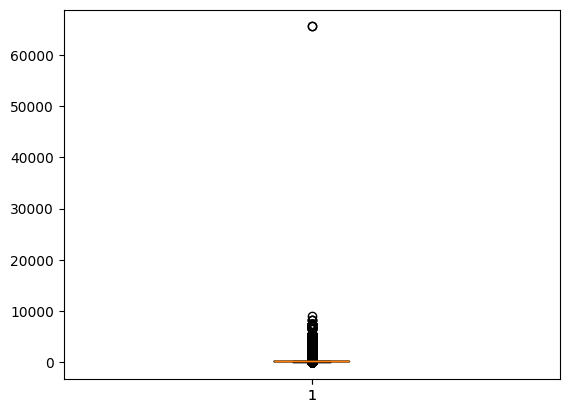

In [12]:
import matplotlib.pyplot as plt
plt.boxplot(data['media_duration']) # quite a few songs that seem to last for hours or even days. Let's remove them.

data = remove_outliers(data,'media_duration')

plt.boxplot(data['media_duration'])

When analyzing ts_listen, it was shown that most of the timestamps were after 2016 while less than one thousand songs were listened before 2016. Therefore, it has been decided to remove outliers.

ts_listen
1970-12-31        237
1973-12-31          0
1976-12-31          0
1979-12-31          0
1982-12-31        379
1985-12-31          0
1988-12-31          0
1991-12-31          0
1994-12-31          0
1997-12-31          1
2000-12-31          0
2003-12-31          2
2006-12-31          0
2009-12-31        108
2012-12-31         12
2015-12-31         48
2018-12-31    7151901
Freq: 3YE-DEC, dtype: int64
Removing outliers from ts_listen with lower boundary of 2016-10-15 13:10:32.375000320 and upper boundary of 2016-12-13 21:35:53.374999808


(array([1.303000e+03, 4.608000e+03, 1.145100e+04, 7.516040e+05,
        1.346619e+06, 1.319193e+06, 1.094724e+06, 1.003305e+06,
        9.546130e+05, 6.625710e+05]),
 array([17089.58644676, 17094.32669676, 17099.06694676, 17103.80719676,
        17108.54744676, 17113.28769676, 17118.02794676, 17122.76819676,
        17127.50844676, 17132.24869676, 17136.98894676]),
 <BarContainer object of 10 artists>)

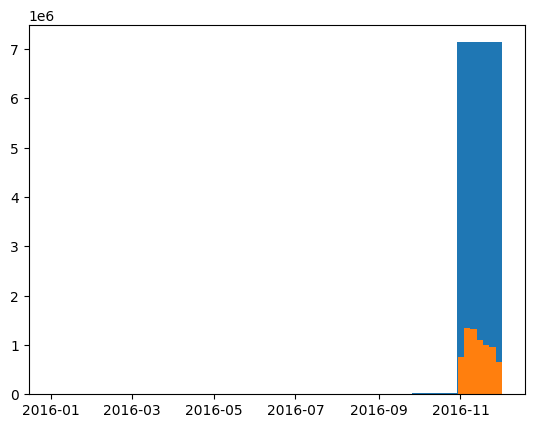

In [13]:
# Grouping by 5-year intervals to see the approximate counts
grouped_data = data.groupby(pd.Grouper(key='ts_listen', freq='3YE')).size()
print(grouped_data) # We can start at 2016

len(data[data['ts_listen'] < pd.Timestamp('2015-12-31')]) # TODO we could remove all which were listened before 2016
filtered_data = data[data['ts_listen'] > pd.Timestamp('2015-12-31')]
plt.hist(filtered_data['ts_listen'])

# outlier removal
data = remove_outliers(data,'ts_listen')

(array([5.40000e+01, 1.21000e+02, 3.70000e+02, 7.58000e+02, 9.34000e+02,
        9.97000e+02, 1.38700e+03, 1.29000e+03, 1.78700e+03, 2.02100e+03,
        2.73500e+03, 4.90800e+03, 5.19500e+03, 3.65690e+04, 3.24259e+05,
        3.85581e+05, 4.01821e+05, 3.85558e+05, 2.77370e+05, 2.81870e+05,
        3.18830e+05, 3.33942e+05, 3.66025e+05, 3.00396e+05, 2.19057e+05,
        2.76626e+05, 2.85963e+05, 3.13078e+05, 2.96868e+05, 2.54893e+05,
        2.00035e+05, 2.51509e+05, 2.62013e+05, 2.52500e+05, 2.35281e+05,
        2.04819e+05, 1.85820e+05, 1.97627e+05, 1.88008e+05, 9.11160e+04]),
 array([17089.58644676, 17090.77150926, 17091.95657176, 17093.14163426,
        17094.32669676, 17095.51175926, 17096.69682176, 17097.88188426,
        17099.06694676, 17100.25200926, 17101.43707176, 17102.62213426,
        17103.80719676, 17104.99225926, 17106.17732176, 17107.36238426,
        17108.54744676, 17109.73250926, 17110.91757176, 17112.10263426,
        17113.28769676, 17114.47275926, 17115.65782176

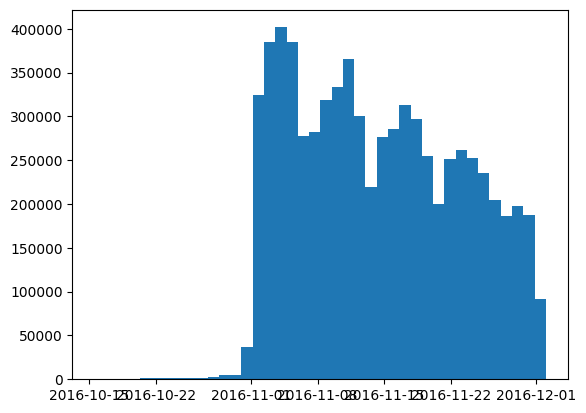

In [16]:
# After outlier removal
plt.hist(data['ts_listen'], bins=40)

{'whiskers': [<matplotlib.lines.Line2D at 0x256228d9f40>,
 'caps': [<matplotlib.lines.Line2D at 0x256228da4e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x256228d9d30>],
 'medians': [<matplotlib.lines.Line2D at 0x256228dab40>],
 'fliers': [<matplotlib.lines.Line2D at 0x256228dae40>],
 'means': []}

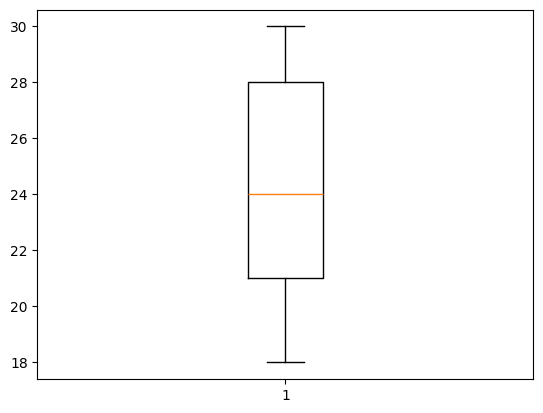

In [14]:
plt.boxplot(data['user_age']) # no outliers here. Ages between 18 and 30